# 3.4 有监督学习

sklearn中提供了许多有监督学习算法，可实现线性回归或逻辑回归等任务。在使用时，只需要简单地调用这些算法的接口函数，将训练数据作为输入，便能训练相应模型，得到的模型运用到其他数据上，达到对未知数据进行分类或回归。
无论采用何种有监督学习算法，基本上操作流程是相同的，大致可分为三步：

1.	实例化。即针对采用的算法进行实例化，也就是定义评估模型对象。

2.	训练。即调用模型接口在训练数据上训练模型，也就是进行数据拟合，训练模型，确定对象的内置参数。各种算法都提供了统一的fit函数接口进行训练。

3.	测试。训练完成后，模型对象的内置参数就确定了，然后就可以通过这个模型对象对新数据进行预测。通常算法都提供了统一的predict函数接口进行预测。
通过统一的训练和测试接口，使得我们在应用各种模型解决实际问题时都极为方便。后续的实战中，我们都会按此过程进行模型学习。


## 3.4.1 多元线性回归实战

多元线性回归是每个样本具有多个特征的线性回归问题，要预期的目标值为这些特征的线性组合，用数学公式表达为：

$$y ̂(w,x)=w_{0}+w_{1} x_{1}+w_{2} x_{2}+...+w_{n} x_{n}$$

下面以加利福尼亚房价预测任务为例，通过加利福尼亚的房屋特征进行分析，应用线性回归算法进行训练建模，对房价进行预测。这些房屋特征包括收入中位数、房屋年龄、房间数目、居住人口数等。

（1）加载数据集

Sklearn的datasets模块提供了加利福尼亚的房屋数据集，因此在线性回归分析之前首先要加载该数据集。


In [1]:
import sklearn
from sklearn import datasets
house = datasets.fetch_california_housing()  #加载数据集
dir(house)  # 显示house的成员

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

下面可以查看data数据和target数据：

In [2]:
X, y = house.data, house.target
print(X.shape, y.shape)  # 显示特征数组形状和标签数组形状
print(X[:5], y[:5])  # 显示前5个样本特征和标签

(20640, 8) (20640,)
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]] [4.526 3.585 3.521 3.413 3.422]


（2）数据预处理

通过前面展示数据的特征不难发现，各维特征的数值有大有小，因此我们可以进行归一化操作。此外，为了测试算法的性能，可以将数据集划分为训练集和测试集。训练集用于训练回归模型，测试集用于验证算法的性能。代码如下：


In [3]:
from sklearn.preprocessing import StandardScaler  # 用于数据归一化
from sklearn.model_selection import train_test_split  # 用于数据集划分
X_std = StandardScaler().fit_transform(X)  # 数据预处理-标准化操作
# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1)

（3）回归建模

如前所述，Sklearn在进行有监督学习时，无论采用何种算法，其建模过程基本都是按照“实例化、训练、测试”三步进行的。下面我们首先采用线性回归算法进行回归建模。

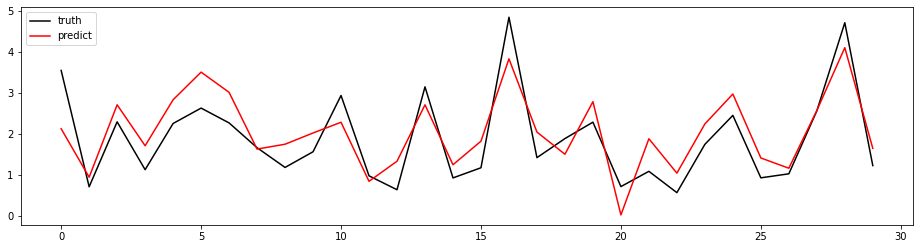

In [4]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
LR_regr = LinearRegression()  # 实例化，定义一个线性回归器
LR_regr.fit(X_train, y_train)  # 应用训练集进行模型训练
y_predict = LR_regr.predict(X_test)  # 对测试集进行预测
# 对比预测结果和真实值(Grand_truth)，对前30个测试结果可视化
plt.figure(figsize=(16,4))
plt.plot(range(30), y_test[:30],  color='black', label="truth")
plt.plot(range(30), y_predict[:30], color='red', label="predict")
plt.legend()

从图中可以看到，预测结果和真实值比较接近，但也存在一定误差。

（4）模型评估

通常，不同的机器学习任务，对算法的评估指标是不同的。Sklearn的metrics模块提供了大量常见的模型评估方法。在这里，我们使用均方误差（MSE）和R2分数（R2 Score）来评估训练的模型。
均方误差公式如下所示：

$$mse(y, y ̂)=\frac{1}{n} ∑_{i=0}^{n-1}(y_{i}-y ̂_{i} )^2 $$

R2分数公式如下所示：

$$R^2 (y, y ̂)=1 - \frac{∑_{i=0}^{n-1}(y_{i}-y ̂_{i} )^2 )}{∑_{i=0}^{n-1}(y_{i}-y ̄)^2 }$$

下面给出使用均方误差和R2分数来评估模型的代码。

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict)
r_2 = r2_score(y_test, y_predict)
print('Mean squared error: %.3f'%(mse))
print('Coefficient of determination: %.3f'%(r_2))

Mean squared error: 0.530
Coefficient of determination: 0.597


实际上，Sklearn中的各种有监督算法也提供了score接口，当模型训练好后，模型对象可以直接调用score函数，给出评价结果，而无需调用predict函数先得到预测值再进行计算。对于线性回归模型，score函数计算的就是基于测试集给出R2分数。示例如下：

In [7]:
score = LR_regr.score(X_test, y_test)  # 测试集的特征和标签作为参数
print('%.3f'%(score))

0.597


（5）模型持久化

有时，我们训练好的模型需要部署到其他环境，直接进行预测任务，而无需再次训练。这就需要对模型进行持久化操作，通常是将其保存到文件中。

最简单的模型持久化方法是使用基于python的joblib工具包，需要注意的是，在使用joblib之前，首先需要安装。


In [8]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


安装完成后，就可以导入该工具包进行模型持久化或加载持久化的模型。例如：

In [9]:
from joblib import dump
dump(LR_regr, 'house_model.joblib')  # 模型持久化


['house_model.joblib']

以上代码将前面训练好的模型LR_regr存储到当面目录下的house_model.joblib文件中，该文件可被复制到其他环境，直接用于预测任务。例如：

In [10]:
from joblib import load
model = load('house_model.joblib')  # 加载训练好的模型
y_pred=model.predict(X_test)  # 进行预测

上述代码表示直接在新环境中加载训练好的模型文件，然后便可以进行预测任务。

以上给出就是多元线性回归模型实战的基本流程。从结果上可以看出，模型在大部分数据上都较好地拟合了数据的数值，但仍然在少部分点上存在较大的拟合误差，没有正确拟合数据的分布。下面
我们采用拟合能力更强的随机森林算法进行训练，并比较两个模型的性能。

随机森林算法属于集成学习方式，所谓集成学习，是指使用多个学习算法构建的模型进行综合预测，以提高单个模型的泛化性和鲁棒性。基于前例中的数据，在此给出训练、预测和模型评价代码：


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
# 定义随机森林回归器
RF_regr = RandomForestRegressor(n_estimators=50, random_state=1)  
RF_regr.fit(X_train, y_train)  # 训练模型
RF_y_preds = RF_regr.predict(X_test)  # 预测
# 模型评估
mse = mean_squared_error(y_test, RF_y_preds) # 计算均方误差
r_2 = r2_score(y_test, RF_y_preds) # 计算R2分数
print('Mean squared error: %.3f'%(mse))
print('Coefficient of determination: %.3f'%(r_2))


Mean squared error: 0.266
Coefficient of determination: 0.798


显然，无论从哪种评价指标看，随机森林模型效果要明显优于线性回归模型，这也说明各个特征与房价之间更倾向于非线性关系。

读者可自行采用其他各种回归器并通过设置不同参数，进行几组实验，以到更为恰当的算法。


## 3.4.2 逻辑回归实战

逻辑回归算法的训练、测试与算法评估方法与线性回归基本相同，只不过在对模型进行评价时，其预测结果与真实值不同，则结果就是预测错误，这一点与线性回归是不同的，线性回归在评价时考虑了预测结果与真实值的差异程度。在调用逻辑回归模型的score函数时，通常都是计算平均正确率（Mean Accuracy）评价指标，而不再是R2分数，其计算公式如下：
 
$$Mean-Acc=\frac{1}{c} ∑_{i=0}^{c-1}\frac{m_{i}}{n_{i}}$$ 

下面将以乳腺癌分类诊断任务为例，给出基于sklearn实现逻辑回归算法的过程，代码如下：

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()  # 加载数据集
X, y = data.data, data.target  # 取得数据特征和标签类别
X = StandardScaler().fit_transform(X)  # 数据标准化
# 切分训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)  
logistic_clf = LogisticRegression()  # 模型实例化
logistic_clf.fit(X_train, y_train)  # 训练模型
acc = logistic_clf.score(X_test, y_test)  # 效果评估
print("The accuracy is %.3f" % acc)  # 打印平均正确率
y_predict = logistic_clf.predict(X_test)  # 进行预测
print(y_predict[:5], y_test[:5])  # 打印预测结果和真实值

The accuracy is 0.971
[1 0 1 0 0] [1 0 1 0 0]


平均正确率评价指标针对的是所有类别的指标，我们也可以分析各个类别的精确率（Precision）、召回率（Recall）和F1值（F1-score）等性能指标，各指标计算公式如下：

$$Precision(c_{i})=\frac{m_{i}}{m_{i}+o_{i} }$$

$$Recall(c_{i})=\frac{m_{i}}{n_{i}}$$ 

$$F1-score(c_{i})=\frac{2Precision(c_{i})Recall(c_{i})}{Precision(c_{i})+Recall(c_{i})}$$

上述公式中，ci表示第i个类别，ni表示第i类样本的总数，mi表示第i类样本中预测正确的数目，oi表示其他类样本被错误识别为第i类的样本数目。

借助metrics模块的classification_report函数，可以直接得到各类别的性能指标，或借助confusion_matrix函数，得到预测结果的混淆矩阵。执行代码如下：


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(f"{classification_report(y_test, y_predict)}")
print(confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 61   2]
 [  3 105]]


结果中，第一行表示的是总的平均正确率，左列的0和1代表类别标签，最右列的support表示各类别真实的样本数量。显示结果的最后两行是打印的混淆矩阵，矩阵中的第i行第j列表示第i类真实样本被识别为第j类的样本数量，例如标签为0的样本有2个被误识别为了类别1，标签为1的样本有3个被误识别为了类别0。通过混淆矩阵，可以方便的查看各类别的误识别情况。

分析前面的代码，会发现我们在调用train_test_split函数时，将数据集按7：3的比例由随机状态参数random_state=1进行随机切分了训练集和测试集，最终的结果是在切分后的测试集上得到的。虽然都按7：3进行切分，但不同的随机切分结果得到的训练集和测试集是不同的，从而导致准确率也会不同。为了解决这个问题，人们多采用交叉验证（Cross-validation）方式来评估算法性能。简单的理解交叉验证，就是将数据集分为k份，每次取其中不同的一份作为测试集，其他k-1份作为训练集，重复k次实验，综合k次的结果分析算法的性能。

Sklearn的model_selection模块提供了交叉验证方法。示例如下：


In [15]:
from sklearn.model_selection import cross_val_score
data = load_breast_cancer()  # 加载数据集
X, y = data.data, data.target  # 取得数据特征和标签类别
X = StandardScaler().fit_transform(X)  # 数据标准化
logistic_clf = LogisticRegression()  # 模型实例化
scores = cross_val_score(logistic_clf, X, y, cv=5)  # 分为5份，进行5次验证
print(scores, '\n%0.2f accuracy with std %0.2f'%(scores.mean(), scores.std()))


[0.98245614 0.98245614 0.97368421 0.97368421 0.99115044] 
0.98 accuracy with std 0.01


上述代码中，cross_val_score返回5次验证的平均正确率指标，存储再scores中。打印时首先打印scores的值，然后分别打印5次性能的均值和方差。

cross_val_score函数可通过scoring参数设置不同的性能指标，如'precision_macro'、'recall_macro'或'f1_macro'，分别表示模型的精确率、召回率和F1值，它们都是逻辑回归模型常用的性能评价指标。示例如下：

In [16]:
scores = cross_val_score(logistic_clf, X, y, cv=5, scoring='precision_macro')
print(scores, '\n%0.2f precision with std %0.2f'%(scores.mean(), scores.std()))

[0.98132984 0.98630137 0.98       0.97410625 0.98837209] 
0.98 precision with std 0.01


若希望同时的得到多个性能指标，则可以使用cross_validate函数。例如：

In [17]:
from sklearn.model_selection import cross_validate
scoring=['precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(logistic_clf, X, y, cv=5, scoring=scoring)
print(scores)


{'fit_time': array([0.01500201, 0.01300263, 0.01200414, 0.01100254, 0.01200175]), 'score_time': array([0.00099945, 0.00099969, 0.00099993, 0.00200009, 0.00200105]), 'test_precision_macro': array([0.98132984, 0.98630137, 0.98      , 0.97410625, 0.98837209]), 'test_recall_macro': array([0.98132984, 0.97674419, 0.96428571, 0.96924603, 0.99295775]), 'test_f1_macro': array([0.98132984, 0.98115079, 0.9712774 , 0.97158288, 0.99057155])}


可以看到，scores不仅存储了指定的性能指标，还存储了每次验证的拟合时间等多个性能指标。以上给出了交叉验证的简单示例，读者可参考帮助，添加各种参数，完成更为复杂的交叉验证方法。